In [114]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
import seaborn as sns
from skfuzzy import control

In [31]:
open_time = control.Antecedent(np.arange(10, 51, 1), 'open time')
NS_cars = control.Antecedent(np.arange(0, 91, 1), 'NS cars')
WE_cars = control.Antecedent(np.arange(0, 91, 1), 'WE cars')
change_time = control.Consequent(np.arange(-20, 21, 1), 'change time')

In [32]:
open_time['s'] = fuzz.trapmf(open_time.universe, [10, 10, 20, 25])
open_time['m'] = fuzz.trapmf(open_time.universe, [20, 25, 35, 40])
open_time['l'] = fuzz.trapmf(open_time.universe, [35, 40, 50, 50])

NS_cars['xs'] = fuzz.trapmf(NS_cars.universe, [0, 0, 12, 18])
NS_cars['s'] = fuzz.trapmf(NS_cars.universe, [15, 21, 31, 37])
NS_cars['m'] = fuzz.trapmf(NS_cars.universe, [34, 40, 50, 56])
NS_cars['l'] = fuzz.trapmf(NS_cars.universe, [53, 59, 69, 75])
NS_cars['xl'] = fuzz.trapmf(NS_cars.universe, [72, 78, 90, 90])

WE_cars['xs'] = fuzz.trapmf(WE_cars.universe, [0, 0, 12, 18])
WE_cars['s'] = fuzz.trapmf(WE_cars.universe, [15, 21, 31, 37])
WE_cars['m'] = fuzz.trapmf(WE_cars.universe, [34, 40, 50, 56])
WE_cars['l'] = fuzz.trapmf(WE_cars.universe, [53, 59, 69, 75])
WE_cars['xl'] = fuzz.trapmf(WE_cars.universe, [72, 78, 90, 90])

change_time['s'] = fuzz.gaussmf(change_time.universe, 20, 7)
change_time['m'] = fuzz.gaussmf(change_time.universe, 0, 7)
change_time['l'] = fuzz.gaussmf(change_time.universe, -20, 7)

In [33]:
def parse_matlab_list(fpath):
    times = ['s', 'm', 'l']
    cars = ['xs', 's', 'm', 'l', 'xl']
    with open(fpath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        lines = [[int(i) - 1 for i in line.split()[:4]] for line in lines]
        for line in lines:
            print(
                f"control.Rule(open_time['{times[line[0]]}'] & NS_cars['{cars[line[1]]}'] & WE_cars['{cars[line[2]]}'], change_time['{times[line[3]]}']),")


parse_matlab_list('matlab.txt')

control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['xs'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['s'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['m'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['l'], change_time['m']),
control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['xl'], change_time['m']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['xs'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['s'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['m'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['l'], change_time['m']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['xl'], change_time['m']),
control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['xs'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['s'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['

In [43]:
cs = control.ControlSystem([
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['l'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['xl'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['l'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['xl'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['l'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['xl'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['l'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['xl'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['l'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['xl'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['xs'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['s'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['s'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['m'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['l'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['l'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['xl'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['xs'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['s'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['xs'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['s'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['xs'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['s'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['xs'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['s'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['m'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['xs'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['s'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['m'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['xl'], change_time['l'])
])

sim = control.ControlSystemSimulation(cs)

In [51]:
sim.input['open time'] = 1
sim.input['NS cars'] = 10
sim.input['WE cars'] = 1

sim.compute()
sim.output['change time']



14.405319578804047

In [131]:
def recompute(open_time, NS, WE) -> float:
    sim.input['open time'] = open_time
    sim.input['NS cars'] = NS
    sim.input['WE cars'] = WE
    sim.compute()
    return sim.output['change time']

In [184]:
def simulate(open_time, NS, WE, count=100, seed=0, fuzzy=False) -> np.ndarray:
    np.random.seed(seed)

    time_waits = []
    for i in range(count):
        cars_to_pass = np.sqrt(open_time / np.random.random() * 0.6)
        NS = max(0, NS - cars_to_pass)
        WE = max(0, WE - cars_to_pass)
    
        time_waits.append((NS + WE) * open_time)

        NS += np.random.randint(5, 30)
        WE += np.random.randint(5, 30)
    
        if fuzzy:
            open_time += recompute(open_time, NS, WE)
    return np.array(time_waits, dtype=float)

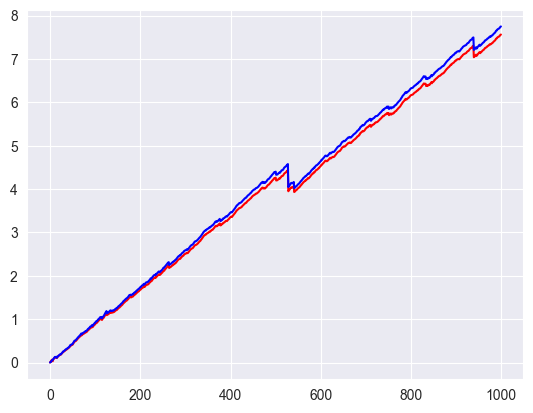

In [185]:
sim_amount = 1000
seed = 0
_open = 30
_NS = 10
_WE = 10

time_waits_fuzzy = simulate(_open, _NS, _WE, count=sim_amount, seed=seed, fuzzy=True)
time_waits_normal = simulate(_open, _NS, _WE, count=sim_amount, seed=seed, fuzzy=False)

plt.plot(time_waits_fuzzy / sim_amount / 60, color='red')
plt.plot(time_waits_normal / sim_amount / 60, color='blue')
plt.show()

In [128]:
time_waits

[256.38263080231764,
 671.5567536093276,
 2389.1923413626832,
 4489.629302811189,
 5758.538335068313,
 8318.510320010657,
 9883.918375104484,
 10251.525040482167,
 11192.95319414724,
 11963.058614486472,
 13694.10651840866,
 16090.435392945696,
 17798.22438224475,
 19548.507745414012,
 21316.24657795888,
 22820.876335763256,
 24112.93469955448,
 25368.163056344187,
 27847.318356880984,
 29503.51395123184,
 31176.401241593085,
 32450.350002215622,
 33005.19117624406,
 34105.72130466165,
 35079.50415732971,
 35885.36756300876,
 37134.42488685637,
 37993.261822626795,
 39181.41623241208,
 40962.43073866104,
 41383.75385580317,
 42427.003764365174,
 43971.930669004694,
 45888.243962107095,
 46887.70302344398,
 48333.63827845796,
 48622.45214392995,
 49687.70216047326,
 50912.49788944489,
 51359.05132552974,
 52253.68692817522,
 53537.18010153399,
 54267.36806608,
 54820.611922710574,
 55869.42164589987,
 57788.32860215842,
 59319.417288789446,
 61074.31861479663,
 62470.77567932392,
 63198